Dataset Loaded. First 5 rows:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
Checking for missing values in X_train:
0    0
1    0
2 

/tmp/ipython-input-2-2488395481.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2-2488395481.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



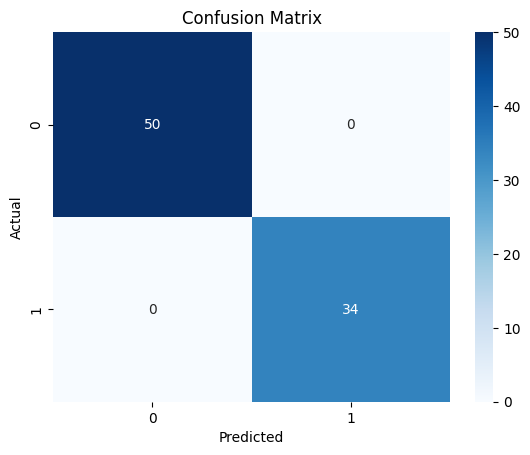


Model Coefficients:
       Feature  Coefficient
2          Sex    -4.152263
6         Fare     0.109420
5        Parch     0.068665
1       Pclass    -0.059756
4        SibSp     0.054218
7     Embarked    -0.049538
0  PassengerId    -0.018685
3          Age    -0.006587

Intercept: -1.5916224873329239


/tmp/ipython-input-2-2488395481.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


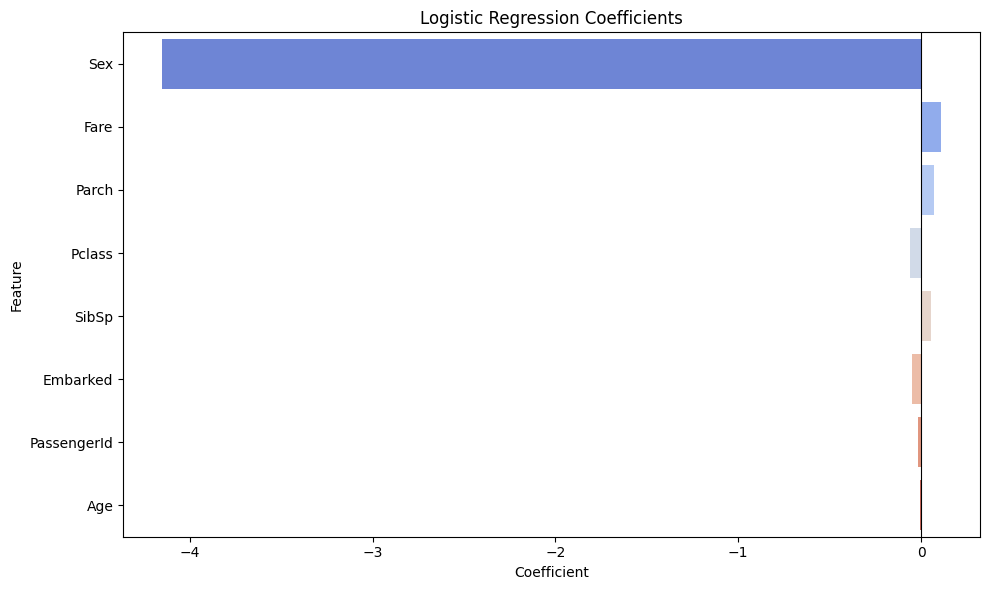

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import zipfile
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt




df = pd.read_csv('/content/drive/MyDrive/titanic_dataset/archive/titanic.csv')
print("Dataset Loaded. First 5 rows:")
print(df.head())
# Preprocessing
# Drop columns that may not help or have too many missing values
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
# Fill missing Age with median, Embarked with mode
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])

le_embarked = LabelEncoder()
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])


#Features & Target
X = df.drop('Survived', axis=1)
y = df['Survived']

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Check for NaN values before training
print("Checking for missing values in X_train:")
print(pd.DataFrame(X_train).isnull().sum())

# Fill or remove NaNs if any exist
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
#Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)
#Predictions & Evaluation
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
#Optional - Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#Check model coefficients
feature_names = X.columns  # Original feature names before scaling
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Create a DataFrame for better readability
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients to see most influential features
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df.sort_values(by='Abs_Coefficient', ascending=False, inplace=True)

print("\nModel Coefficients:")
print(coef_df[['Feature', 'Coefficient']])
print(f"\nIntercept: {intercept}")
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Logistic Regression Coefficients')
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()
